In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pprint

import regressor_models

In [14]:
%pprint

Pretty printing has been turned ON


In [2]:
attempts = 0
while attempts < 100:
    try:
        data_folder = input("Enter the datasets you wish to use: ")
        # if data_folder == "all":
            # make dictionary with input and output of all datasets
        inpu = sio.loadmat(f"data/{data_folder}/Train_text.mat")
        mat_input = inpu["final_output"]
        inpu_validation = sio.loadmat(f"data/{data_folder}/Test_text.mat")
        mat_input_validation = inpu_validation["final_output"]
        break
    except:
        attempts += 1
        print("Invalid file name, please choose one of the following")
        print("egemaps, emobase_feature, emobase_feature_large, text, text_large, word_embedding, all")

In [3]:
Actual_number_of_input = 88
number_of_features = mat_input.shape[1] - 1

# Regression data
X = mat_input[:, 0:Actual_number_of_input]
y = mat_input[:, number_of_features]

scaler = StandardScaler()
# scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

X_validation = mat_input_validation[:, 0:Actual_number_of_input]
X_validation = scaler.transform(X_validation)
validation_identifier = mat_input_validation[:, number_of_features]

In [4]:
regressor_models.linear_regressor(X, y, X_validation, validation_identifier)
regressor_models.random_forest_regressor(X, y, X_validation, validation_identifier)
regressor_models.mlp_regressor(X, y, X_validation, validation_identifier)
regressor_models.sgd_regressor(X, y, X_validation, validation_identifier)
regressor_models.gradient_boosting_regressor(X, y, X_validation, validation_identifier)

C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 293.89546073
Iteration 2, loss = 291.37071237
Iteration 3, loss = 288.89797270
Iteration 4, loss = 286.46932933
Iteration 5, loss = 284.07615647
Iteration 6, loss = 281.70803997
Iteration 7, loss = 279.35338276
Iteration 8, loss = 276.99974693
Iteration 9, loss = 274.63414763
Iteration 10, loss = 272.24336674
Iteration 11, loss = 269.81424535
Iteration 12, loss = 267.33388420
Iteration 13, loss = 264.78979667
Iteration 14, loss = 262.17008494
Iteration 15, loss = 259.46364241
Iteration 16, loss = 256.66037404
Iteration 17, loss = 253.75145456
Iteration 18, loss = 250.72961341
Iteration 19, loss = 247.58936665
Iteration 20, loss = 244.32714569
Iteration 21, loss = 240.94133265
Iteration 22, loss = 237.43222163
Iteration 23, loss = 233.80192730
Iteration 24, loss = 230.05426257
Iteration 25, loss = 226.19461905
Iteration 26, loss = 222.22992114
Iteration 27, loss = 218.16870708
Iteration 28, loss = 214.02127947
Iteration 29, loss = 209.79979163
Iteration 30, loss = 20

C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


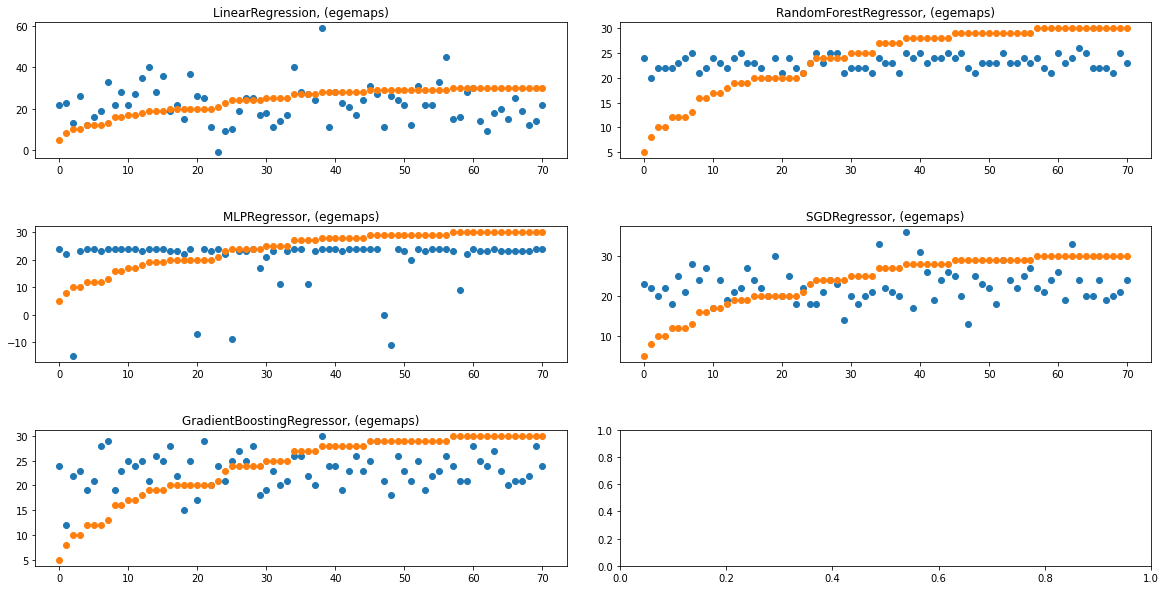

In [5]:
fig, axs = plt.subplots(3,2, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()
graph_counter = 0

for k in regressor_models.results_dict:
    prediction = regressor_models.results_dict[k]["Pred"]
    actual = regressor_models.results_dict[k]["Actual"]

    try:
        arr1inds = actual.argsort()
        actual = actual[arr1inds]
        prediction = prediction[arr1inds]
        x_coordinates = np.arange(prediction.size)
        axs[graph_counter].scatter(x_coordinates, prediction)
        axs[graph_counter].scatter(x_coordinates, actual)
        axs[graph_counter].set_title(f"{k}, ({data_folder})")
        graph_counter += 1
    except:
        print(k)
        pass

In [19]:
hidden = {"Pred", "Actual"}

for k in regressor_models.results_dict:
    print(k)
    print({x: regressor_models.results_dict[k][x] for x in regressor_models.results_dict[k] if x not in hidden})

LinearRegression
{'MSE': 135.08450704225353, 'CCC': -0.005305838636957506, 'Pearson R': {'R': -0.005806085002480958, 'p-value': 0.9616724498913329}}
RandomForestRegressor
{'MSE': 41.04225352112676, 'CCC': 0.08207849365999094, 'Pearson R': {'R': 0.19914916763073787, 'p-value': 0.09591302806677332}}
MLPRegressor
{'MSE': 120.98591549295774, 'CCC': 0.04441004396506608, 'Pearson R': {'R': 0.05079498890004494, 'p-value': 0.6739881652788791}}
SGDRegressor
{'MSE': 57.38028169014085, 'CCC': 0.060375519750519746, 'Pearson R': {'R': 0.06842277536321466, 'p-value': 0.5707331477855592}}
GradientBoostingRegressor
{'MSE': 48.732394366197184, 'CCC': 0.1044177585289206, 'Pearson R': {'R': 0.12736283405507315, 'p-value': 0.2898516428562405}}
